In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
df = pd.read_excel('rasin.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


1. Identify the columns with missing data from the given dataset.

In [4]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

2. Perform type conversions for required numeric columns

In [5]:
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [6]:
df_x = df.drop('Class', axis=1)

3. Perform One-Hot Encoding, Ordinal Encoding and Label Encoding on the required columns

In [7]:
df.nunique()

Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         896
Extent             900
Perimeter          900
Class                2
dtype: int64

In [8]:
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


4. Analyze the data and perform imputation using the best-fitted technique (mean, median, mode and KNN (k=5)) for the given column

5. Identify the outliers from the given columns using statistical methods (IQR, z-score)

In [9]:
df_x.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [10]:
for i in df_x:
    highest = df_x[i].mean() + 3*df_x[i].std()
    lowest = df_x[i].mean() - 3*df_x[i].std()
    print("\nOutliers of ", i, ":")
    print(df[(df[i] > highest) | (df[i] < lowest)][i])


Outliers of  Area :
487    210923
507    208264
552    204864
580    206720
581    205497
668    206689
708    222915
804    223075
812    235047
866    225043
880    218459
Name: Area, dtype: int64

Outliers of  MajorAxisLength :
85     843.956653
487    984.045491
506    997.291941
694    820.724022
836    949.662672
Name: MajorAxisLength, dtype: float64

Outliers of  MinorAxisLength :
490    412.382817
552    440.497127
581    414.188326
616    413.927473
769    408.535619
804    411.810369
880    492.275279
Name: MinorAxisLength, dtype: float64

Outliers of  Eccentricity :
13     0.510584
23     0.419754
34     0.369212
43     0.492087
106    0.460121
156    0.348730
192    0.444950
197    0.432307
235    0.502580
251    0.496118
253    0.507424
316    0.418382
356    0.458545
483    0.500991
880    0.507432
Name: Eccentricity, dtype: float64

Outliers of  ConvexArea :
85     221396
487    278217
506    221527
694    219952
708    227170
804    225916
812    239093
836    225592
8

In [11]:
for i in df_x:
    p25 = df_x[i].quantile(0.25)
    p75 = df_x[i].quantile(0.75)
    iqr = p75 - p25
    upper = p75 + 1.5 * iqr
    lower = p25 - 1.5 * iqr
    print("\nOutliers of ", i, ":")
    print(df[(df_x[i] > upper) | (df_x[i] < lower)][i])


Outliers of  Area :
85     180898
467    184784
469    195383
475    177264
479    189637
487    210923
506    182160
507    208264
515    188651
516    202118
522    177206
541    193032
552    204864
560    178334
574    193558
580    206720
581    205497
590    177916
616    199015
622    193818
650    194864
657    192815
666    178692
668    206689
671    182823
678    182788
708    222915
711    204226
751    182122
768    175247
769    195281
771    175946
777    181926
804    223075
812    235047
836    181126
855    189069
866    225043
870    179668
880    218459
893    187391
Name: Area, dtype: int64

Outliers of  MajorAxisLength :
85     843.956653
290    722.853917
467    740.108710
469    755.012914
487    984.045491
506    997.291941
509    719.505878
540    730.760960
574    769.425149
634    731.561876
657    731.440292
668    746.145341
694    820.724022
708    731.559406
812    772.956877
836    949.662672
866    740.003743
Name: MajorAxisLength, dtype: float64

Out

6. Explore sklearn’s module for outlier detection (eg. LOF, OneClassSVM)

In [12]:
for i in df_x:
    lof = LocalOutlierFactor(n_neighbors=100, contamination=0.005)
    df['lof'] = lof.fit_predict(df[[i]])
    print("\nOutliers of ", i)
    print(df[df['lof']==-1][i])


Outliers of  Area
59      25387
382     26908
435     28216
812    235047
866    225043
Name: Area, dtype: int64

Outliers of  MajorAxisLength
85     843.956653
487    984.045491
506    997.291941
694    820.724022
836    949.662672
Name: MajorAxisLength, dtype: float64

Outliers of  MinorAxisLength
59     144.618672
382    143.710872
552    440.497127
581    414.188326
880    492.275279
Name: MinorAxisLength, dtype: float64

Outliers of  Eccentricity
23     0.419754
34     0.369212
156    0.348730
316    0.418382
506    0.962124
Name: Eccentricity, dtype: float64

Outliers of  ConvexArea
59      26139
382     28607
435     30316
487    278217
812    239093
Name: ConvexArea, dtype: int64

Outliers of  Extent
85     0.454189
459    0.491002
506    0.379856
536    0.491460
836    0.414154
Name: Extent, dtype: float64

Outliers of  Perimeter
85     2253.557
487    2697.753
506    2303.690
694    2289.889
836    2352.029
Name: Perimeter, dtype: float64


In [13]:
for i in df_x:
    ifor = IsolationForest(contamination=0.005, random_state=42)
    df['iforest'] = ifor.fit_predict(df[[i]])
    print("\nOutliers of ", i)
    print(df[df['iforest']==-1][i])


Outliers of  Area
708    222915
804    223075
812    235047
866    225043
880    218459
Name: Area, dtype: int64

Outliers of  MajorAxisLength
85     843.956653
487    984.045491
506    997.291941
694    820.724022
836    949.662672
Name: MajorAxisLength, dtype: float64

Outliers of  MinorAxisLength
59     144.618672
382    143.710872
552    440.497127
581    414.188326
880    492.275279
Name: MinorAxisLength, dtype: float64

Outliers of  Eccentricity
23     0.419754
34     0.369212
156    0.348730
197    0.432307
316    0.418382
Name: Eccentricity, dtype: float64

Outliers of  ConvexArea
487    278217
708    227170
812    239093
866    229195
880    228259
Name: ConvexArea, dtype: int64

Outliers of  Extent
85     0.454189
459    0.491002
506    0.379856
536    0.491460
836    0.414154
Name: Extent, dtype: float64

Outliers of  Perimeter
85     2253.557
487    2697.753
506    2303.690
694    2289.889
836    2352.029
Name: Perimeter, dtype: float64


In [14]:
ocsvm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)
df['area_svm'] = ocsvm.fit_predict(df[['Area']])
df['area_svm'].value_counts()

area_svm
 1    820
-1     80
Name: count, dtype: int64

In [15]:
df[df['area_svm']==-1].Area

15      33565
59      25387
88      35237
155     83229
186     36145
        ...  
866    225043
876    119336
878    154498
880    218459
895     83248
Name: Area, Length: 80, dtype: int64

In [16]:
df.drop(['lof', 'iforest', 'area_svm'], axis=1, inplace=True)

7. Identify the categorical and numeric columns in the dataset

In [17]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [18]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
categorical_columns

Index([], dtype='object')

8. Perform scaling using (Min-max Scaler/StandardScaler) on the required columns

In [19]:
to_scale = numeric_columns[:-1]

In [20]:
mmscaler = MinMaxScaler()
df[to_scale] = mmscaler.fit_transform(df[to_scale])
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791,1
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842,1
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594,1
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284,1
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493,1


9. Perform feature selection to identify the columns relevant for the target column.(Filter Method/Wrapper Method) 

In [21]:
corr_matrix = df.corr()
corr = corr_matrix['Class'].abs().sort_values(ascending=False)
print(corr)

Class              1.000000
MajorAxisLength    0.673194
Perimeter          0.665981
Area               0.625715
ConvexArea         0.625567
MinorAxisLength    0.503102
Eccentricity       0.438500
Extent             0.154689
Name: Class, dtype: float64


In [22]:
rfc = RandomForestClassifier(n_estimators=100)
rfe = RFE(estimator=rfc, n_features_to_select=4)

rfe.fit(df.drop('Class', axis=1), df['Class'])
selected_features = df.drop('Class', axis=1).columns[rfe.support_]

print("Selected features by RFE:", selected_features)

Selected features by RFE: Index(['Area', 'MajorAxisLength', 'ConvexArea', 'Perimeter'], dtype='object')


10. Identify and perform feature extraction by creating new columns from the existing columns for dimensionality reduction.

11. Perform dimensionality reduction using PCA and t-SNE. Compare the features obtained from both methods

In [24]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791,1
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842,1
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594,1
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284,1
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493,1


In [33]:
x = df.drop('Class',axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca1 = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_pca1)

          PC1       PC2
0    0.013518 -0.009493
1   -0.081595  0.058443
2    0.048447  0.071879
3   -0.403742 -0.068519
4   -0.134115 -0.416232
..        ...       ...
895 -0.022790  0.086304
896  0.030251  0.096424
897  0.107199 -0.175607
898  0.090514  0.128271
899  0.056735  0.292064

[900 rows x 2 columns]


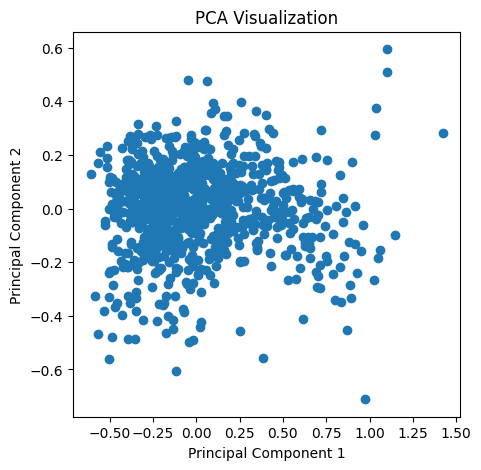

In [39]:
plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [37]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(x)

df_tsne1 = pd.DataFrame(X_tsne, columns=['Component1', 'Component2'])
print(df_tsne1)

     Component1  Component2
0      2.703251    3.241601
1     -4.835787   -1.887528
2      7.922152   15.396197
3    -33.031940    0.048593
4     -6.666785  -26.508854
..          ...         ...
895    3.301408   14.243470
896    7.250960   16.017021
897    5.467224  -20.524244
898   15.150019    8.093380
899    4.277839   23.382877

[900 rows x 2 columns]


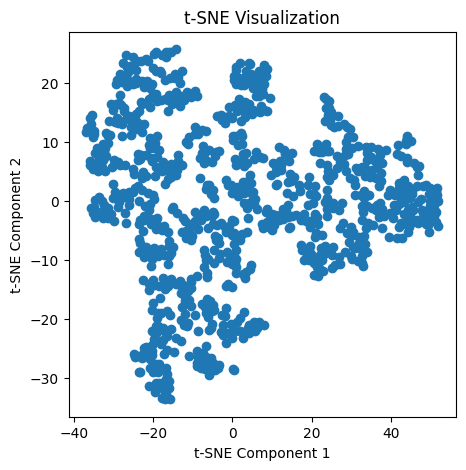

In [40]:
plt.figure(figsize=(5, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

12. Analyze the distribution of the target labels in the dataset.
 - Perform sampling to obtain an evenly distributed dataset.

In [ ]:
df['Class'].value_counts()

Class
1    450
0    450
Name: count, dtype: int64


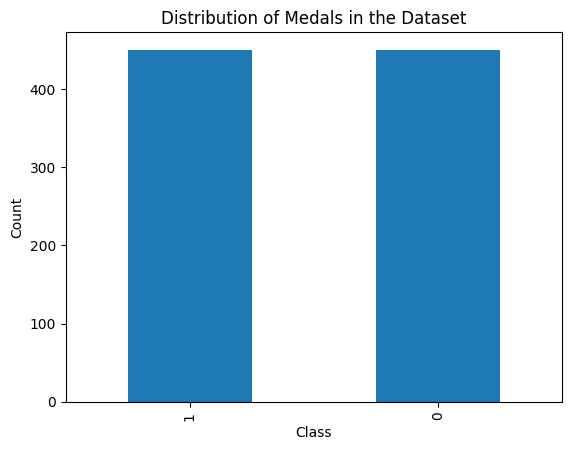

In [ ]:
df['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Medals in the Dataset')
plt.show()